## 7-1. 人の移動を Simulation してみよう
空間上に個体を Random に配置して個体の動きを加える。
それぞれの個体について「時間発展方程式」によって動きを表現する際、その「変量」に対して「拘束条件」が加わる。

In [1]:
# 人の動きの Simulation を行なう##
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Parameter設定
dt = 1.0  # １コマあたりの時間
dl = 1.0  # １コマあたりの各個体の移動距離
num_time = 100  # Simulation を行なうコマ数
num_person = 10  # Simulation を行なう人の数
x_size = 8.0  # 領域の x方向の Size
y_size = 6.0  # 領域の y方向の Size
## ※横方向に 8.0m, 縦方向に 6.0m の家具のない部屋に10人の人がいるような Image.

# 初期化（初期値設定）
list_plot = []  # Animation の各コマを格納する配列
# 各個体の初期値(x, y)を設定
x = np.zeros((num_time, num_person))
y = np.zeros((num_time, num_person))
for i in range(num_person):
    x[0, i] = np.random.rand() * x_size
    y[0, i] = np.random.rand() * y_size

# 時間発展方程式
fig = plt.figure()
for t in range(1, num_time):
    # 変量の計算（各個体がどの方向にどれだけ移動するのか）
    dx = (np.random.rand(num_person) - 0.5) * dl
    dy = (np.random.rand(num_person) - 0.5) * dl
    # 拘束条件の設定（変量が領域内に収まっているかどうかなどを評価し、誤った移動をしないための判断を行なう）
    for i in range(num_person):
        # 計算した変量(dx, dy)に従った行動を行なった際に、領域（x: 0~x_size まで留まっているか）を確認
        if ((x[t - 1, i] + dx[i] * dt) > 0) and ((x[t - 1, i] + dx[i] * dt) < x_size):
            x[t, i] = x[t - 1, i] + dx[i] * dt
        else:
            x[t, 1] = x[t - 1, i]  # もし、計算した変量従った移動を行なった際に、建物の領域からはみだしてしまうようであれば、移動は行なわない
        # 計算した変量(dx, dy)に従った行動を行なった際に、領域（y: 0~y_size まで留まっているか）を確認
        if ((y[t - 1, i] + dy[i] * dt) > 0) and ((y[t - 1, i] + dy[i] * dt) < y_size):
            y[t, i] = y[t - 1, i] + dy[i] * dt
        else:
            y[t, i] = y[t - 1, i]  # もし、計算した変量従った移動を行なった際に、建物の領域からはみだしてしまうようであれば、移動は行なわない
    # 時刻ごとの Graph描画
    img = plt.scatter(x[t], y[t], color="black")
    plt.xlim([0, x_size])
    plt.ylim([0, y_size])
    list_plot.append([img])

# Graph(Animation)描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc("animation", html="jshtml")
plt.close()
anim

## 7-2. 緊急時の避難行動を Simulation してみよう
意図を持った動作を Programing する

避難行動の動き
1. 出入り口に近づく
2. 出入り口に達したら、出入り口から外に出る
3. 外に出たら、出入り口からなるべく離れる
の 3-step で描く

In [1]:
# 避難行動の Simulation を行なう#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Parameter設定
dt = 1.0  # １コマあたりの時間
dl = 0.3  # １コマあたりの個体の移動距離
num_time = 100  # Simulation を行なうコマ数
num_person = 30  # Simulation を行なう人の人数
x_size = 8.0  # 領域の x方向の Size
y_size = 6.0  # 領域の y方向の Size
th_nearest = 0.2  # 人がぶつかることを示す距離
th_exit = 0.5  # 出入口に達したことを示す距離
x_exit = (x_size) / 2  # 出入口の x座標
y_exit = 1 / 2  # 出入口の y座標

# 初期化（初期値設定）
list_plot = []
x = np.zeros((num_time, num_person))
y = np.zeros((num_time, num_person))
for i in range(num_person):
    x[0, i] = np.random.rand() * x_size / 2  # 領域の左側に限定するため、0~x_size/2 までのいずれかの値を乱数で生成
    y[0, i] = np.random.rand() * y_size
flag_area = np.zeros(num_person)  # それぞれの個体が、どの Step にいるか状態を記述する

# 壁の生成
ywall = list(range(1, 10))
xwall = [int(x_size / 2)] * 9

# 時間発展方程式
fig = plt.figure()
for t in range(1, num_time):
    # 変量の計算
    dx = np.zeros(num_person)
    dy = np.zeros(num_person)
    for i in range(num_person):
        if flag_area[i] == 0:  # Step1
            # 出入口に向かって、x, y方向それぞれについて距離 dl だけ移動する
            dx[i] = np.sign(x_exit - x[t - 1, i]) * dl
            dy[i] = np.sign(y_exit - y[t - 1, i]) * dl
        elif flag_area[i] == 1:  # Step2
            # 横方向のみに（出入口から出る方向のみに）距離 dl だけ移動する
            dx[i] = dl
            dy[i] = 0
        else:  # Step3
            # x, y 方向にそれぞれについて距離0から dl の間の乱数分だけ移動する。
            dx[i] = np.random.rand() * dl
            dy[i] = np.random.rand() * dl

    # 拘束条件の設定
    for i in range(num_person):
        # ２つの変数を用意して、変量計算した距離分、実際に動いて問題ないかどうかを、x, y それぞれの方向について確かめる
        flag_iter_x = 1
        flag_iter_y = 1
        # 移動領域の Object がないかどうかを確認
        for j in range(num_person):
            if not i == j:  # 動きたい方向に別の人がいると移動できないのでそれを確かめる。
                dx_to_j = x[t - 1, i] + dx[i] - x[t - 1, j]
                dy_to_j = y[t - 1, i] + dy[i] - y[t - 1, j]
                if (np.sqrt(dx_to_j ** 2 + dy_to_j ** 2) < th_nearest):
                    if (flag_area[i] == flag_area[j]):
                        flag_iter_x = 0
                        flag_iter_y = 0
                        break
        # 領域内かどうかを判定
        if ((x[t - 1, i] + dx[i] * dt) > 0) and ((x[t - 1, i] + dx[i] * dt) < x_size):
            if (flag_area[i] == 0) and ((x[t - 1, i] + dx[i] * dt) > x_size / 2):
                flag_iter_x = 0
            elif (flag_area[i] == 2) and ((x[t - 1, i] + dx[i] * dt) < x_size / 2):
                flag_iter_x = 0
        else:
            flag_iter_x = 0
        if ((y[t - 1, i] + dy[i] * dt) < 0) or ((y[t - 1, i] + dy[i] * dt) > y_size):
            flag_iter_y = 0
        # 更新
        if flag_iter_x == 1:
            x[t, i] = x[t - 1, i] + dx[i] * dt
        else:
            x[t, i] = x[t - 1, i]
        if flag_iter_y == 1:
            y[t, i] = y[t - 1, i] + dy[i] * dt
        else:
            y[t, i] = y[t - 1, i]
        # 出口に達したかどうかの確認
        dx_to_exit = x_exit - x[t, i]
        dy_to_exit = y_exit - y[t, i]
        if (np.sqrt(dx_to_exit ** 2 + dy_to_exit ** 2) < th_exit):
            flag_area[i] = 1
        if (flag_area[i] == 1) and (x[t, i] > (x_size / 2)):
            flag_area[i] = 2
    # 時刻ごとの Graph描画
    img = plt.scatter(x[t], y[t], color="black")
    plt.xlim([0, x_size])
    plt.ylim([0, y_size])
    plt.plot(xwall, ywall, 'b')
    list_plot.append([img])

# Graph(Animation)描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc("animation", html="jshtml")
plt.close()
anim

## 7-3. それぞれの人の移動の様子を可視化してみよう
Animation による可視化するだけだと、定量的な確認を行なうことができない為、その結果を可視化する

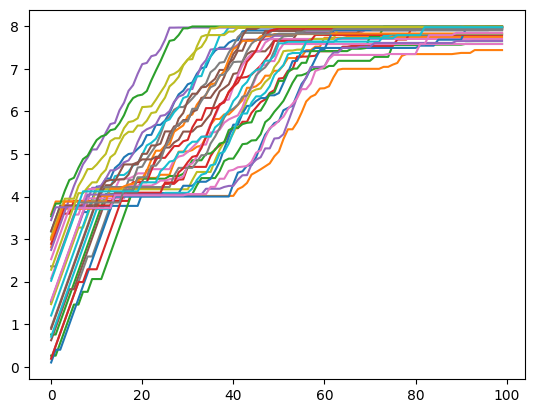

In [3]:
# それぞれの人の移動の様子を可視化する
import numpy as np
import matplotlib.pyplot as plt
for i in range(num_person):
    plt.plot(x[:, i])
plt.show()

それぞれの人の移動履歴（座標位置の履歴）を格納した x を描画。
- 横軸: Animation のコマ数
- 縦軸: それぞれのコマにおける x座標の位置

を示す。

このような Graph を描画することで、設定した Parameter毎の様子がどのように異なるかを定量的に記録できる。